In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train=pd.read_csv('C:\\Users\shree\Desktop\dsmp project\sign_mnist_train.csv')
test=pd.read_csv('C:\\Users\shree\Desktop\dsmp project\sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
#get our training labels
labels=train['label'].values

In [5]:
#view the unique label till 24
unique_val=np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

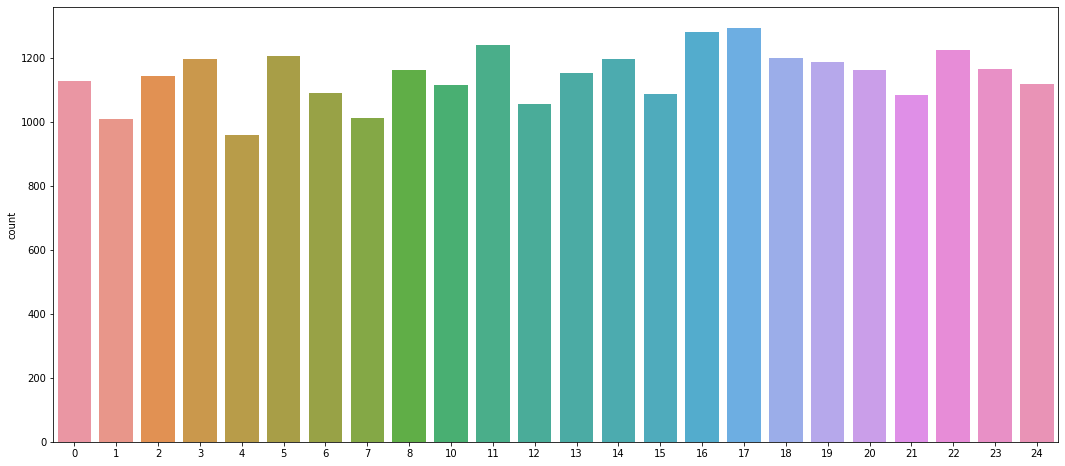

In [6]:
#plot qantities in each class
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [7]:
#drop training labels from our training data so we can separate it 
train.drop('label',axis=1,inplace=True)

In [8]:
#extract the image data from each row in our csv, remember it's in a row of 784 columns
images=train.values
images=np.array([np.reshape(i,(28,28)) for i in images])
images=np.array([i.flatten() for i in images])

In [9]:
#hot one encode our labels
from sklearn.preprocessing import LabelBinarizer
label_binrizer=LabelBinarizer()
labels=label_binrizer.fit_transform(labels)

In [10]:
#view our labels
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


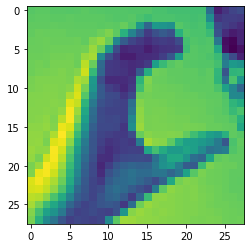

In [11]:
#inspect an image
index=2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [12]:
#use opencv to view 10 random images from our training data
import cv2
import numpy

for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im=images[rand]
    
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample,None, fx=10,fy=10,interpolation=cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
#split our data into x_train,y_train and y_test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.3,random_state=101)

In [14]:
#start loading our tensorflow modules and define out batch size etc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

batch_size=128
num_classes=24
epochs=10

In [15]:
#scale our images
x_train=x_train/255
x_test=x_test/255

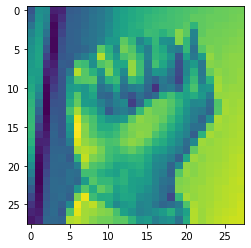

In [16]:
#reshape them into the size required by TF and keras
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
plt.imshow(x_train[0].reshape(28,28))

In [17]:
#create our cnn model
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes,activation='softmax'))

In [18]:
#compile our model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [ ]:
#train our model
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 34s 2ms/sample - loss: 2.6993 - accuracy: 0.1713 - val_loss: 1.8242 - val_accuracy: 0.4510
Epoch 2/10
19218/19218 [==============================] - 29s 2ms/sample - loss: 1.4290 - accuracy: 0.5252 - val_loss: 0.9491 - val_accuracy: 0.6955
Epoch 3/10
19218/19218 [==============================] - 29s 2ms/sample - loss: 0.8050 - accuracy: 0.7275 - val_loss: 0.5630 - val_accuracy: 0.8208
Epoch 4/10
19218/19218 [==============================] - 29s 2ms/sample - loss: 0.5480 - accuracy: 0.8106 - val_loss: 0.4129 - val_accuracy: 0.8560
Epoch 5/10
19218/19218 [==============================] - 29s 1ms/sample - loss: 0.3867 - accuracy: 0.8648 - val_loss: 0.2854 - val_accuracy: 0.9150
Epoch 6/10
19218/19218 [==============================] - 29s 1ms/sample - loss: 0.2812 - accuracy: 0.9054 - val_loss: 0.1709 - val_accuracy: 0.9544
Epoch 7/10
 2304/19218 [==>...........................] -

In [ ]:
#save our model
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

In [ ]:
#view our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [ ]:
#reshape our test data so that we can evaluate it's performance on unseen data
test_labels = test['label']

In [ ]:
test.drop('label', axis = 1, inplace = True)

In [ ]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])


In [ ]:
test_labels = label_binrizer.fit_transform(test_labels)

In [ ]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
test_images.shape

In [ ]:
test_images.dtype

In [ ]:
import tensorflow

In [ ]:
 test_images = tensorflow.cast(test_images, tensorflow.float32)

In [ ]:
y_pred = model.predict(test_images)

In [ ]:
#get accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,y_pred.round())

In [ ]:
#create function to match label to letter
def getLetter(result):
    classLabels={
      0:'A',
      1:'B',
      2:'C',
      3:'D',
      4:'E',
      5:'F',
      6:'G',
      7:'H',
      8:'I',
      9:'K',
      10:'L',
      11:'M',
      12:'N',
      13:'O',
      14:'P',
      15:'Q',
      16:'R',
      17:'S',
      18:'T',
      19:'U',
      20:'V',
      21:'W',
      22:'X',
      23:'Y'
  }
    try:
        res=int(result)
        return classLabels[res]
    except:
        return "Error"

# test on actual web cam

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()

    frame=cv2.flip(frame,1)
    roi=frame[100:400, 320:620]
    cv2.imshow('roi',roi)
    roi=cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    roi=cv2.resize(roi,(28,28),interpolation=cv2.INTER_AREA)

    cv2.imshow('roi sacled and gray',roi)
    copy=frame.copy()
    cv2.rectangle(copy,(320,100),(620,400),(255,0,0),5)
  
    roi=roi.reshape(1,28,28,1)

    roi = tensorflow.cast(roi, tensorflow.float32)
    result=str(model.predict_classes(roi,1,verbose=0)[0])
    cv2.putText(copy,getLetter(result),(300,100),cv2.FONT_HERSHEY_COMPLEX,2,(0,255,0),2)
    cv2.imshow('frame',copy)

    if cv2.waitKey(1)==13:
        break
cap.realease()
cv2.destroyAllWindows()    